# Population_GDP_Analysis

## Import

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

## Load CSVs

In [75]:
# Load population data
df_pop = pd.read_csv("population.csv") 

# Load GDP data
df_gdp = pd.read_csv("gdp.csv")

Let's preview both datasets and check for structure, missing values, and column meanings.

In [77]:
display(df_pop.head())
display(df_gdp.head())

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54922.0
1,Aruba,ABW,1961,55578.0
2,Aruba,ABW,1962,56320.0
3,Aruba,ABW,1963,57002.0
4,Aruba,ABW,1964,57619.0


,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09


## Preview & Clean

We'll:
- Rename columns for clarity
- Check and handle missing values
- Ensure both datasets have compatible keys for merging

In [80]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16930 entries, 0 to 16929
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  16930 non-null  object 
 1   Country Code  16930 non-null  object 
 2   Year          16930 non-null  int64  
 3   Value         16930 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 529.2+ KB


In [81]:
df_pop.describe(include=['O'])

,Country Name,Country Code
count,16930,16930
unique,265,265
top,Aruba,ABW
freq,64,64


In [82]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13979 non-null  object 
 1   Country Code  13979 non-null  object 
 2   Year          13979 non-null  int64  
 3   Value         13979 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 437.0+ KB


In [83]:
df_gdp.describe(include=['O'])

,Country Name,Country Code
count,13979,13979
unique,262,262
top,Zimbabwe,ZWE
freq,64,64


In [84]:
# Rename for clarity
df_pop.rename(columns={'Value': 'Population'}, inplace=True)
df_gdp.rename(columns={'Value': 'GDP'}, inplace=True)

In [85]:
# Check for missing values
print(df_pop.isnull().sum())
print('='*50)
print(df_gdp.isnull().sum())


Country Name    0
Country Code    0
Year            0
Population      0
dtype: int64
Country Name    0
Country Code    0
Year            0
GDP             0
dtype: int64


##  JOIN

We'll merge both datasets using `pd.merge()` on:
- `Country Name`
- `Year`

In [88]:
# Inner join on Country Name and Year
df_merged = pd.merge(df_pop, df_gdp, how='inner', on=['Country Name', 'Year'])
print(df_merged.head())

  Country Name Country Code_x  Year  Population Country Code_y           GDP
0        Aruba            ABW  1986     59931.0            ABW  4.055866e+08
1        Aruba            ABW  1987     59159.0            ABW  4.877095e+08
2        Aruba            ABW  1988     59331.0            ABW  5.966480e+08
3        Aruba            ABW  1989     60443.0            ABW  6.955307e+08
4        Aruba            ABW  1990     62753.0            ABW  7.648045e+08


##  EDA

GDP vs Population scatter plot

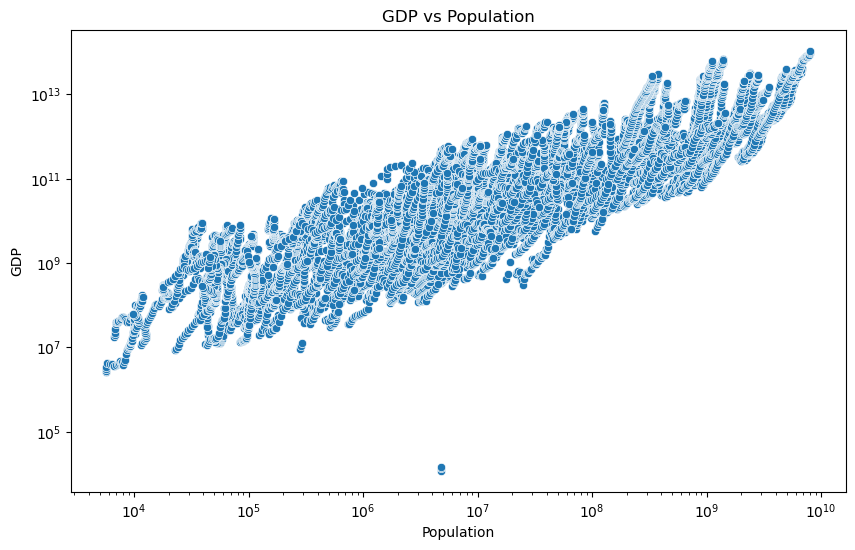

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Population", y="GDP", data=df_merged)
plt.title("GDP vs Population")
plt.xscale("log")
plt.yscale("log")
plt.show()


Top 10 countries by population in 2020

In [93]:
top_2020 = df_merged[df_merged['Year'] == 2020].sort_values(by="Population", ascending=False).head(10)
print(top_2020[['Country Name', 'Population', 'GDP']])

                     Country Name    Population           GDP
13684                       World  7.856139e+09  8.557772e+13
5516             IDA & IBRD total  6.667541e+09  3.252859e+13
7520          Low & middle income  6.438170e+09  2.949192e+13
8326                Middle income  5.758609e+09  2.905174e+13
5452                    IBRD only  4.879367e+09  3.010386e+13
3248   Early-demographic dividend  3.396051e+09  1.098101e+13
7456          Lower middle income  2.966397e+09  6.081790e+12
13232         Upper middle income  2.792212e+09  2.296995e+13
3312          East Asia & Pacific  2.369439e+09  2.715648e+13
7648    Late-demographic dividend  2.316785e+09  2.253118e+13


## Export 

In [95]:
df_merged.to_csv("merged_population_gdp.csv", index=False)

## Conclusion

In this project, we:
- Loaded and cleaned population and GDP data from two public sources
- Merged them using a common key (`Country Name`, `Year`)
- Explored economic patterns using visualizations
- Observed that GDP and population are often correlated but not perfectly, showing differing economic productivity per person

This project demonstrates data joining and EDA **with Pandas**.
